In [4]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 15.0 MB/s 
     |████████████████████████████████| 1.3 MB 46.1 MB/s 
     |████████████████████████████████| 101 kB 13.6 MB/s 
     |████████████████████████████████| 596 kB 63.4 MB/s 
     |████████████████████████████████| 6.6 MB 35.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=f671a9d0d13467ff50cb4493bc99ed5a90898abd4c2d5fd06921aee40e0a0271
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pickle
import random
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import CrossEncoder, InputExample, losses, SentenceTransformer, util
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import os

In [9]:
import pickle 
import pandas as pd
import spacy
from tqdm.auto import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from tqdm.notebook import tqdm
tqdm.pandas()
import re
import transformers
from sentence_transformers import SentenceTransformer, util
import nltk
from nltk import tokenize
import pickle
import urllib.request as requests
import json
import statistics
import torch
from collections import defaultdict
import copy
import math

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
!sudo apt-get update -y
!sudo apt-get install python3.9

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,622 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.co

In [6]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

update-alternatives: using /usr/bin/python3.9 to provide /usr/bin/python3 (python3) in auto mode


In [5]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.7   2         auto mode
  1            /usr/bin/python3.6   1         manual mode
  2            /usr/bin/python3.7   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: ^C


In [7]:
!python --version

Python 3.9.13


In [8]:
from wsgiref.simple_server import sys_version


print(sys_version)

CPython/3.7.13


In [11]:
path="drive/MyDrive/Comcast/"

In [13]:
ls


ChildAdwordTargetDatabase.csv  query_passage_margins.pkl
gmo_to_uniqueId.csv            Sampled_Adword_Labeled.csv
PreProcessed_segmented.pkl


In [12]:
os.chdir(path)

In [31]:
nltk.download('punkt')
#nlp = spacy.load("en_core_web_lg")
model = SentenceTransformer('all-mpnet-base-v2')

df=pd.read_csv('gmo_to_uniqueId.csv')
materialID=df['lastRunJob'].to_list()

with open('PreProcessed_segmented.pkl', 'rb') as f:
    newmetalist=pickle.load(f)

sampled_datadf=pd.read_csv("Sampled_Adword_Labeled.csv")

#For Normal process with target labels only

df1=pd.read_csv('ChildAdwordTargetDatabase.csv')
target_dict=dict(zip(df1['Name'], df1.index))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [47]:
listofepisodes=sampled_datadf['lastRunJob'].to_list()

In [48]:
print(listofepisodes)

['FILE_MAF_20210731T020535Z_GMO_00000000040741_01', 'FILE_MAF_20220215T090159Z_GMO_00000000370441_01', 'FILE_MAF_20220213T121447Z_GMO_00000000039091_01', 'FILE_MAF_20220213T173625Z_GMO_00000000039094_01', 'FILE_MAF_20220213T173619Z_GMO_00000000039095_01', 'FILE_MAF_20211105T221830Z_GMO_00000000326366_01', 'FILE_MAF_20210807T072641Z_GMO_00000000015471_01', 'FILE_MAF_20210825T010736Z_GMO_00000000324078_01', 'FILE_MAF_20210731T060326Z_GMO_00000000040739_01', 'FILE_MAF_20210825T013302Z_GMO_00000000338183_01', 'FILE_MAF_20220214T043211Z_GMO_00000000287895_01', 'FILE_MAF_20210731T020638Z_GMO_00000000040762_01', 'FILE_MAF_20211103T115529Z_GMO_00000000326367_01', 'FILE_MAF_20210810T131055Z_GMO_00000000015470_01', 'FILE_MAF_20220215T082050Z_GMO_00000000370434_01', 'FILE_MAF_20210729T030527Z_GMO_00000000039099_01', 'FILE_MAF_20210825T013306Z_GMO_00000000360252_01', 'FILE_MAF_20220215T013014Z_GMO_00000000287891_01', 'FILE_MAF_20210809T195832Z_GMO_00000000019745_01', 'FILE_MAF_20210729T030534Z_GMO

In [51]:
index=materialID.index(listofepisodes[100])
print(index)

1243


In [52]:
passages=[]
for ep in tqdm(listofepisodes):
    index=materialID.index(ep)
    for j in range(len(newmetalist[index])):
        temp=" ".join(newmetalist[index][j])
        passages.append(temp)

  0%|          | 0/380 [00:00<?, ?it/s]

In [53]:
print(len(passages))

2053


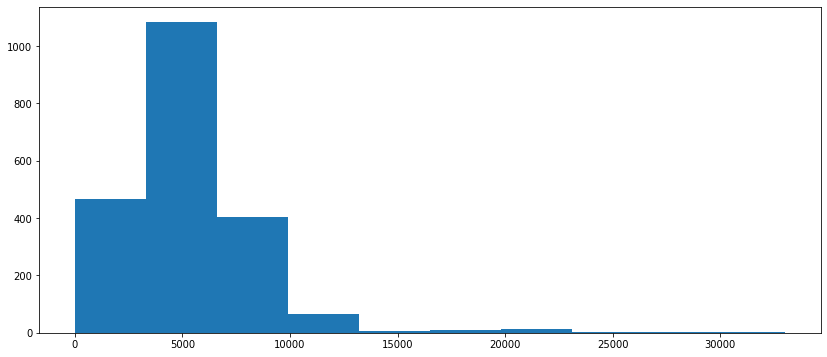

In [54]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist([len(passage) for passage in passages]);

In [55]:
def generate_questions(
    tokenizer: AutoTokenizer, model: AutoModelForSeq2SeqLM, passages,
    batch_size: int=32, device: str='cuda', n_ques_per_passage: int = 3
):

    outputs = []
    n_batches = len(passages) // batch_size + int(len(passages) % batch_size != 0)

    for n in tqdm(range(n_batches)):
        passages_batch = passages[n*batch_size: (n+1)*batch_size]
        inputs = tokenizer(passages_batch, padding=True, truncation=True,
                           max_length=512, return_tensors="pt")
        output = model.generate(
            input_ids=inputs['input_ids'].to(device),
            attention_mask=inputs['attention_mask'].to(device),
            max_length=64,
            do_sample=True,
            top_p=0.9,
            num_return_sequences=n_ques_per_passage
        )
        outputs += output

    questions = [tokenizer.decode(txt, skip_special_tokens=True) for txt in outputs]
    return questions

In [56]:
model_name = "doc2query/msmarco-t5-base-v1"

doc2q_tokenizer = AutoTokenizer.from_pretrained(model_name)
doc2q_model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

In [57]:
n_ques_per_passage = 3
questions = generate_questions(
    doc2q_tokenizer, doc2q_model, passages, n_ques_per_passage=n_ques_per_passage
)

  0%|          | 0/65 [00:00<?, ?it/s]

In [58]:
q2pix = {}  # query to passage index mapping

pix = 0
for i in range(len(questions)):
    if i > 0 and i % n_ques_per_passage == 0:
        pix += 1
    q2pix[questions[i]] = pix

In [59]:

n = 0

for question, passage_ix in q2pix.items():
    print(passages[passage_ix])
    print(f"[Q] {question} ?\n---\n")
    n += 1
    if n == (n_ques_per_passage * 3):
        break


[Q] what kind of company is rwj ?
---


[Q] what are the suffrage words for safety ?
---


[Q] which state specialized in sports development and development? ?
---

  lks be be slammin ' sammy meade fo radio th st five day away . and panther football be ju at that mean . and you know wh time to start talkin ' . sunderstood genius coach eric taylor : mi or onehit wonder u're on . john from seven lake yo come on what do you get taylor bring an extra bankie . ll tell you sammy john i ' ck from tmu I be all for bring taylor ba even though he abandon we . it will be a fun day . you will get to see your old dad get crucify . the whole town like see I get crucify it be good fun . but a more practical car be the 2002 celica . be not about the celica . e sprinkler 's on . it tami th I know it be a practical car . it be about the fact that I can not have you change your class . you need to be in dr . wells ' english class period . mom mrs . odmark only put 12000 mile on the car . and they be al

In [60]:
unique_questions = list(set(questions))
len(unique_questions)

6101

In [61]:
torch.cuda.empty_cache()

In [62]:
retriever = SentenceTransformer("msmarco-distilbert-base-tas-b", device="cuda")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [63]:
passage_embeddings = retriever.encode(passages)

In [65]:
def get_topk_passages(
    model: SentenceTransformer, query: str, passage_embeds: torch.tensor, n: int=10
):
    query_embed = model.encode(query)
    sim_scores = util.cos_sim(query_embed, passage_embeds).numpy()
    top_passages_ix = np.argsort(sim_scores)[0][::-1][:n]
    return top_passages_ix, [sim_scores[0][ix] for ix in top_passages_ix]

In [66]:
query_passage_pairs = []

for query in tqdm(unique_questions):
    top_passages_ixs, _ = get_topk_passages(retriever, query, passage_embeddings, 3)
    query_passage_pairs += [(query, passages[ix]) for ix in top_passages_ixs if ix != q2pix[query]]

  0%|          | 0/6101 [00:00<?, ?it/s]

In [67]:
len(query_passage_pairs)

15951

In [68]:
for query, negative_passage in random.sample(query_passage_pairs, 3):
    print(f"[Q] {query}\n\n[NEGATIVE] {negative_passage}\n\n[POSITIVE] {passages[q2pix[query]]}\n---\n")

[Q] who sings how be you song

[NEGATIVE]   tune . oh yes sincerely tune . 'cause I love you so dearly tune . you look beautiful ... mom . thank you . son . I think I be ready for the sex talk . tune . oh you know how I love you tune . mom you be right to settle . I be glad you marry dad . so be I dear . now would you please find yourself someone and start a family before my hereditary dementia set in

[POSITIVE]   laughter   khloe singsongy : we be almost here guy god I seriously like for we to come all this way and just like hope that someone answer the door and actually let we in   kourtney : this be so cute guy . this be a good vibe . this be like a good nice life . khloe : how do you not know that we would go ...   kim : remember we would ride our bike and go through there to ...   khloe : yes and go through the thing . kourtney : mrs . goggin with the cuckoo clock . khloe : it be right here . kim : yes . khloe : this be it . kim : I need to take a pic on my phone . kourtney : thi

In [69]:
ce = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2', device="cuda")

In [70]:
query_passage_margins = []

for query, passage in tqdm(query_passage_pairs):
    p_score = ce.predict((query, passages[q2pix[query]]))
    n_score = ce.predict((query, passage))
    margin = p_score - n_score
    query_passage_margins.append((query, passages[q2pix[query]], passage, margin))

  0%|          | 0/15951 [00:00<?, ?it/s]

In [2]:
with open("query_passage_margins.pkl", "wb") as f:
    pickle.dump(query_passage_margins, f)

NameError: ignored

In [14]:
with open("query_passage_margins.pkl", "rb") as f:
    query_passage_margins = pickle.load(f)

In [15]:
training_data = []
for query, passage_pos, passage_neg, margin in query_passage_margins:
    training_data.append(InputExample(texts=[query, passage_pos, passage_neg], label=float(margin)))

In [16]:
loader = torch.utils.data.DataLoader(training_data, batch_size=8, shuffle=True)

In [75]:
torch.cuda.empty_cache()

In [17]:
bi_encoder = SentenceTransformer("msmarco-distilbert-base-tas-b", device="cuda")
bi_encoder.max_seq_length = 512

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [18]:
loss = losses.MarginMSELoss(bi_encoder)

In [ ]:
bi_encoder.fit(
    train_objectives=[(loader, loss)],
    epochs=10,
    warmup_steps=int(len(loader)*0.1),
    show_progress_bar=True
)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1994 [00:00<?, ?it/s]